In [1]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install yfinance --upgrade --no-cache-dir

Note: you may need to restart the kernel to use updated packages.


In [53]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-12-29,153.100006,153.889999,151.029999,151.940002,151.940002,39789000,AMAZON
2024-01-02,151.539993,152.380005,148.389999,149.929993,149.929993,47339400,AMAZON
2024-01-03,149.199997,151.050003,148.330002,148.470001,148.470001,49425500,AMAZON
2024-01-04,145.589996,147.380005,144.050003,144.570007,144.570007,56039800,AMAZON
2024-01-05,144.690002,146.589996,144.529999,145.240005,145.240005,45124800,AMAZON
2024-01-08,146.740005,149.399994,146.149994,149.100006,149.100006,46757100,AMAZON
2024-01-09,148.330002,151.710007,148.210007,151.369995,151.369995,43812600,AMAZON
2024-01-10,152.059998,154.419998,151.880005,153.729996,153.729996,44421800,AMAZON
2024-01-11,155.039993,157.169998,153.119995,155.179993,155.179993,49072700,AMAZON


In [5]:
#Apple details
print(AAPL.describe())
print(AAPL.info())

             Open        High         Low       Close   Adj Close  \
count  252.000000  252.000000  252.000000  252.000000  252.000000   
mean   173.890278  175.474961  172.632659  174.199167  173.794534   
std     15.967207   15.694338   15.896875   15.701597   15.877520   
min    132.029999  134.259995  131.440002  133.410004  132.668442   
25%    164.702503  165.750004  163.797504  165.162506  164.495235   
50%    176.494995  178.100006  175.150002  176.610001  176.377632   
75%    186.910000  188.180000  185.200001  187.110001  186.727356   
max    198.020004  199.619995  197.000000  198.110001  198.110001   

             Volume  
count  2.520000e+02  
mean   5.850536e+07  
std    1.727434e+07  
min    2.404830e+07  
25%    4.762092e+07  
50%    5.479970e+07  
75%    6.521030e+07  
max    1.543573e+08  
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-01-12 to 2024-01-12
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------   

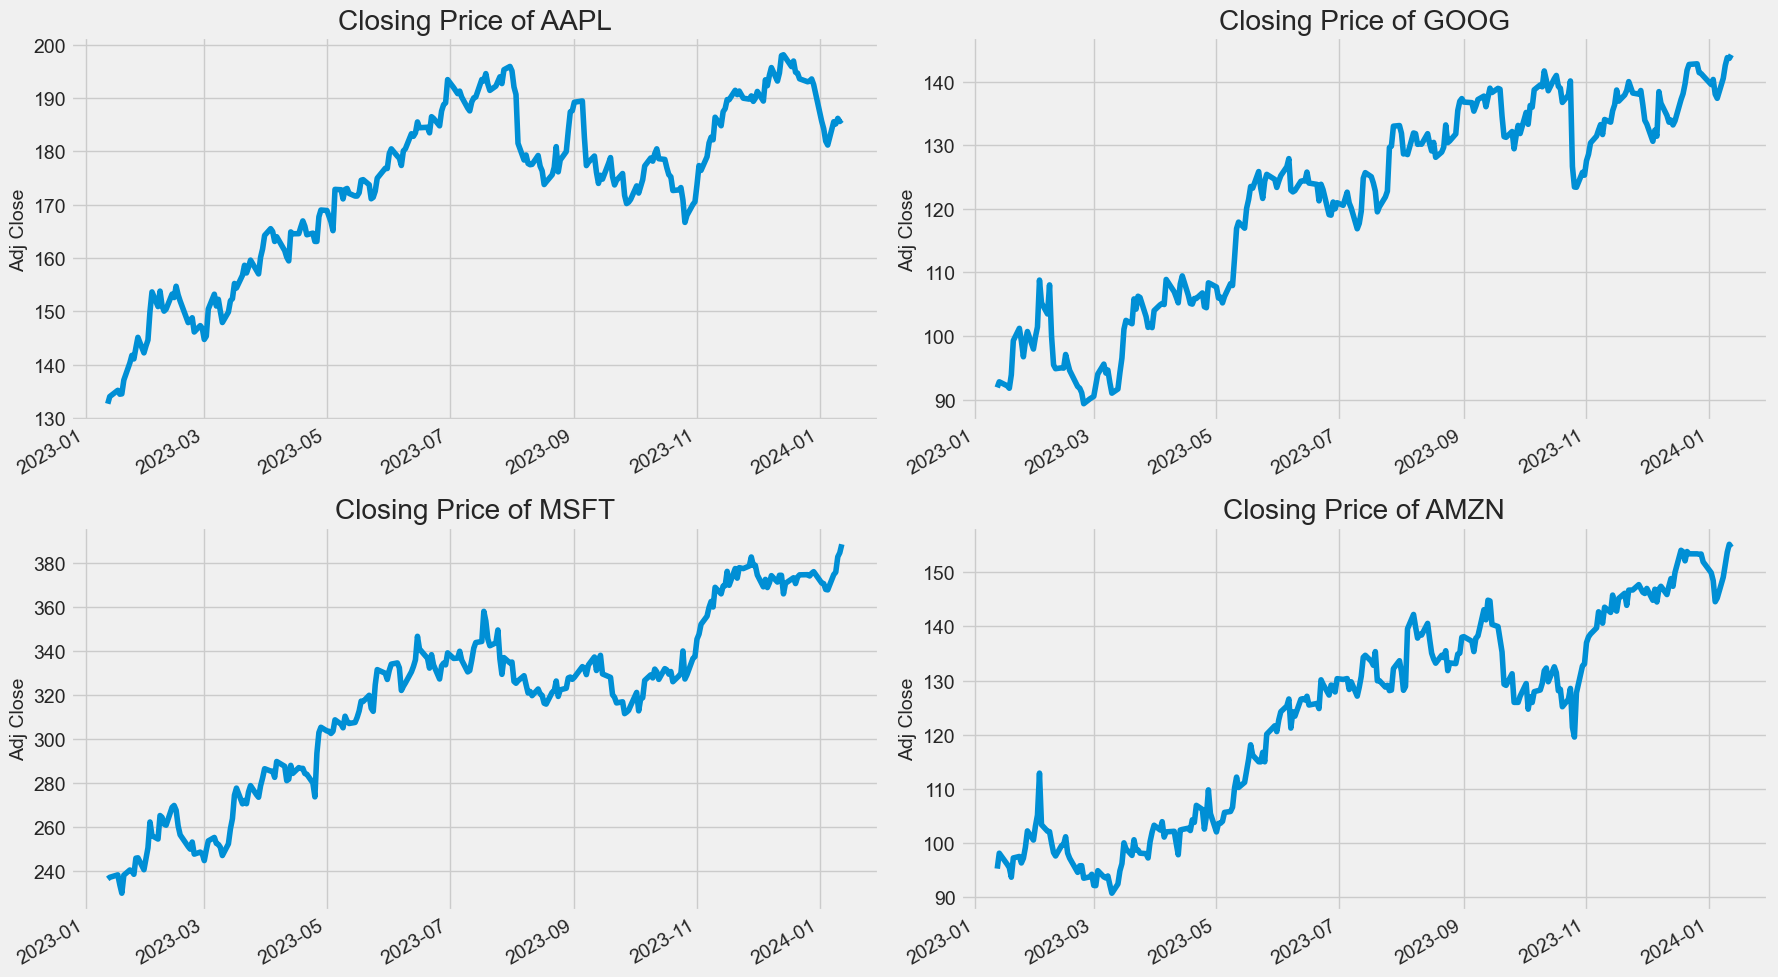

In [9]:
#historical view of the closing price
plt.figure(figsize=(18, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

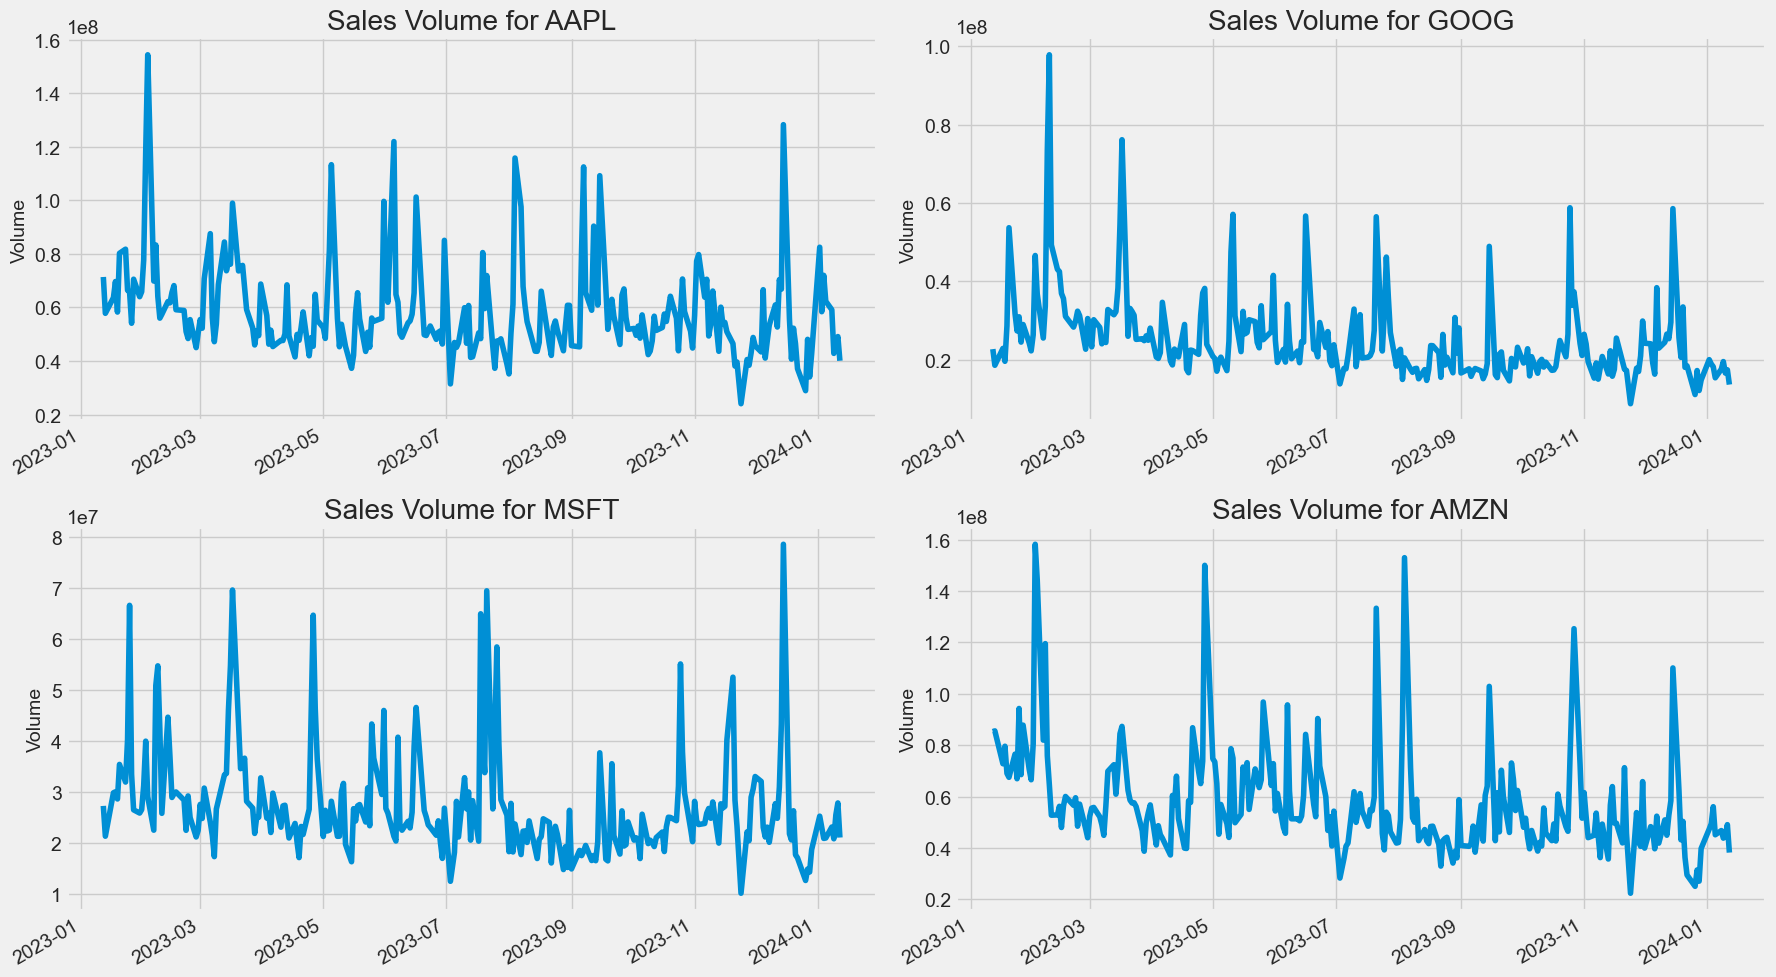

In [10]:
#total volume of stock being traded each day
plt.figure(figsize=(18, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

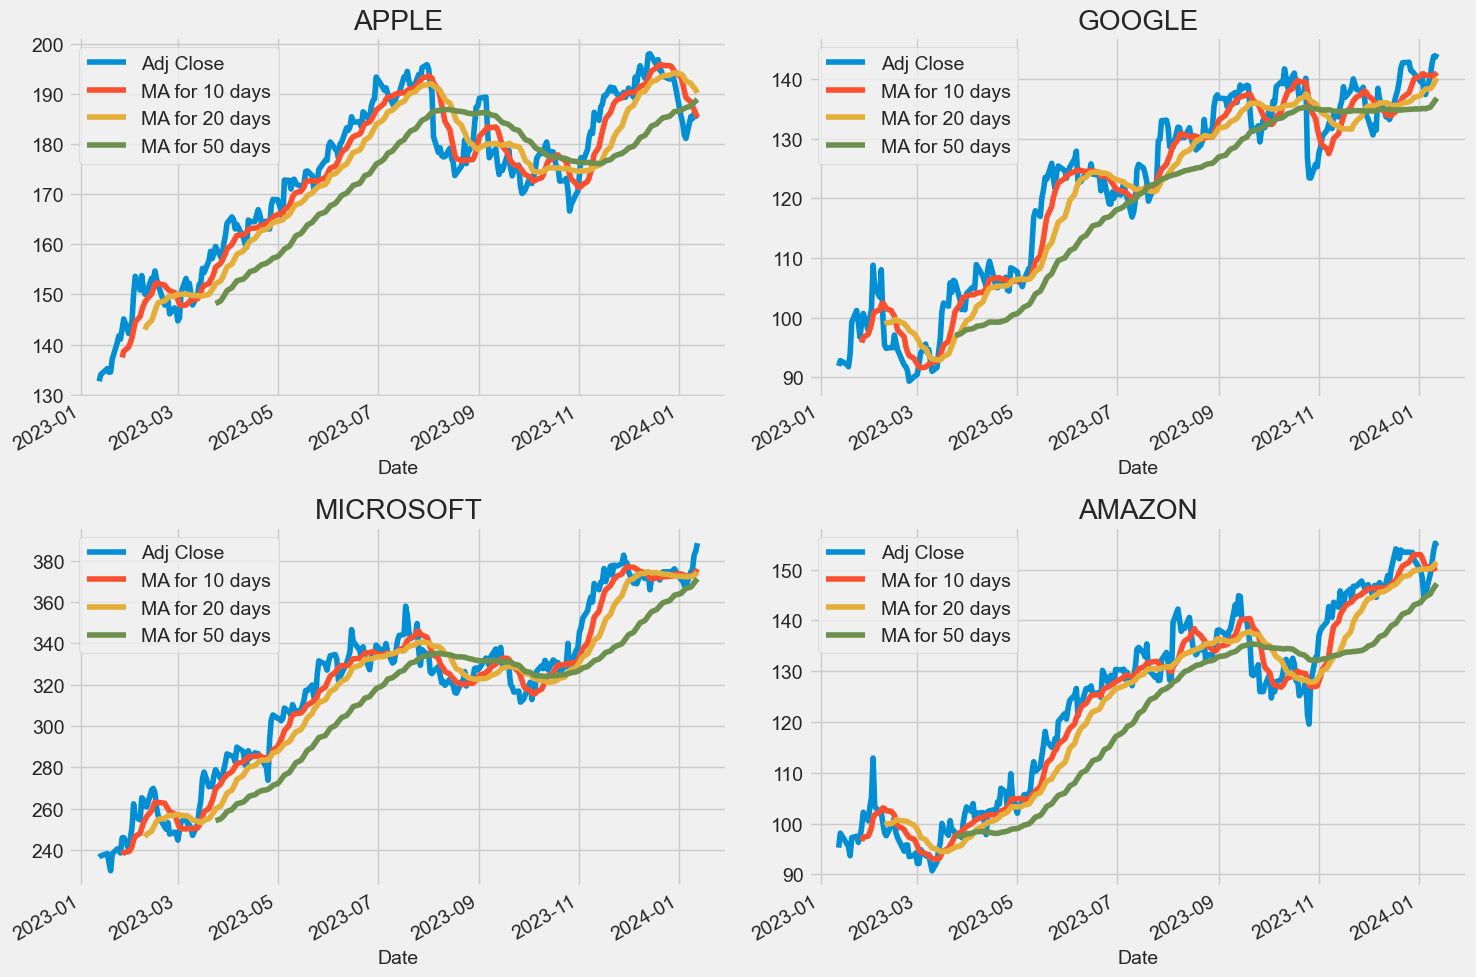

In [16]:
#Moving Average of stocks being observed
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

In [17]:
#percent change of the stocks for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

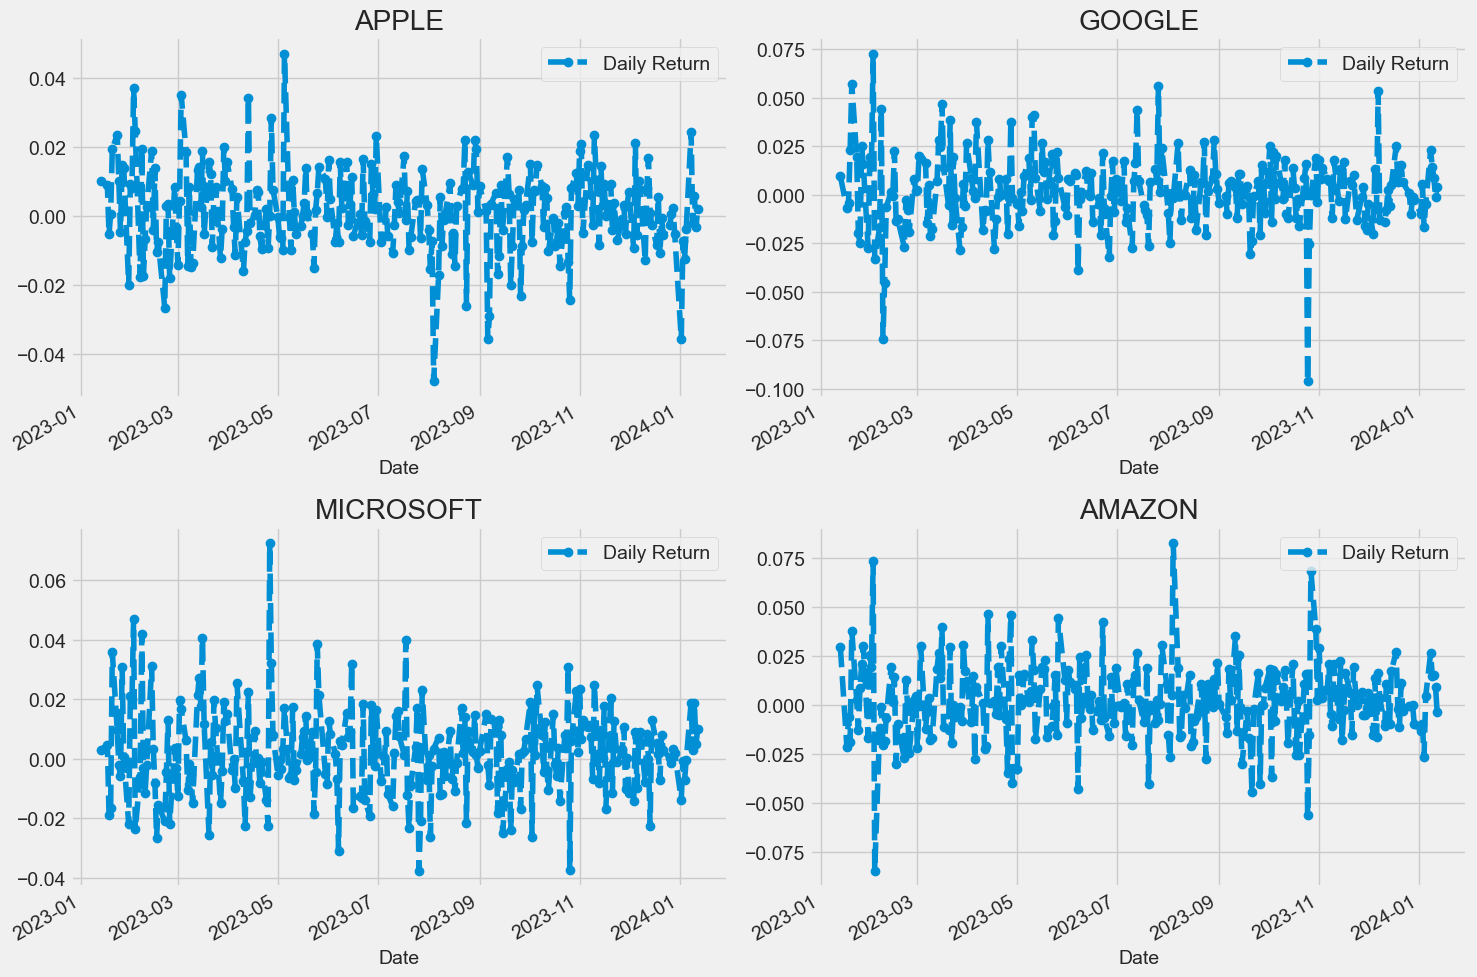

In [18]:
# Plot generated for the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

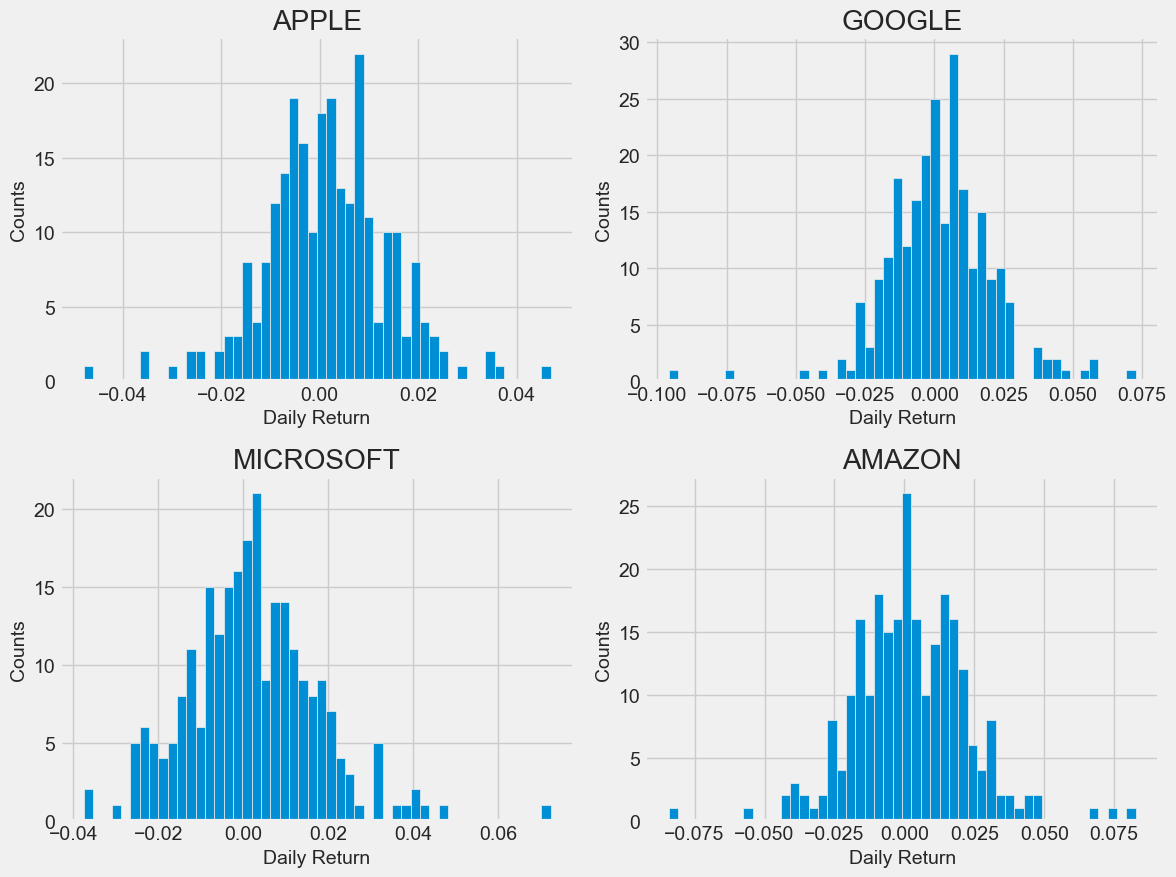

In [19]:
#histogram to denote an average daily return 
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

In [20]:
#Correlation between stocks

# Closing prices for the tech stock list grouped into one DataFrame
closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-01-12,NaN,NaN,NaN,NaN
2023-01-13,0.010119,0.029915,0.009683,0.003019
2023-01-17,0.008756,-0.021097,-0.006897,0.004682
2023-01-18,-0.005370,-0.006143,-0.004123,-0.018889
2023-01-19,0.000444,-0.018647,0.023208,-0.016454


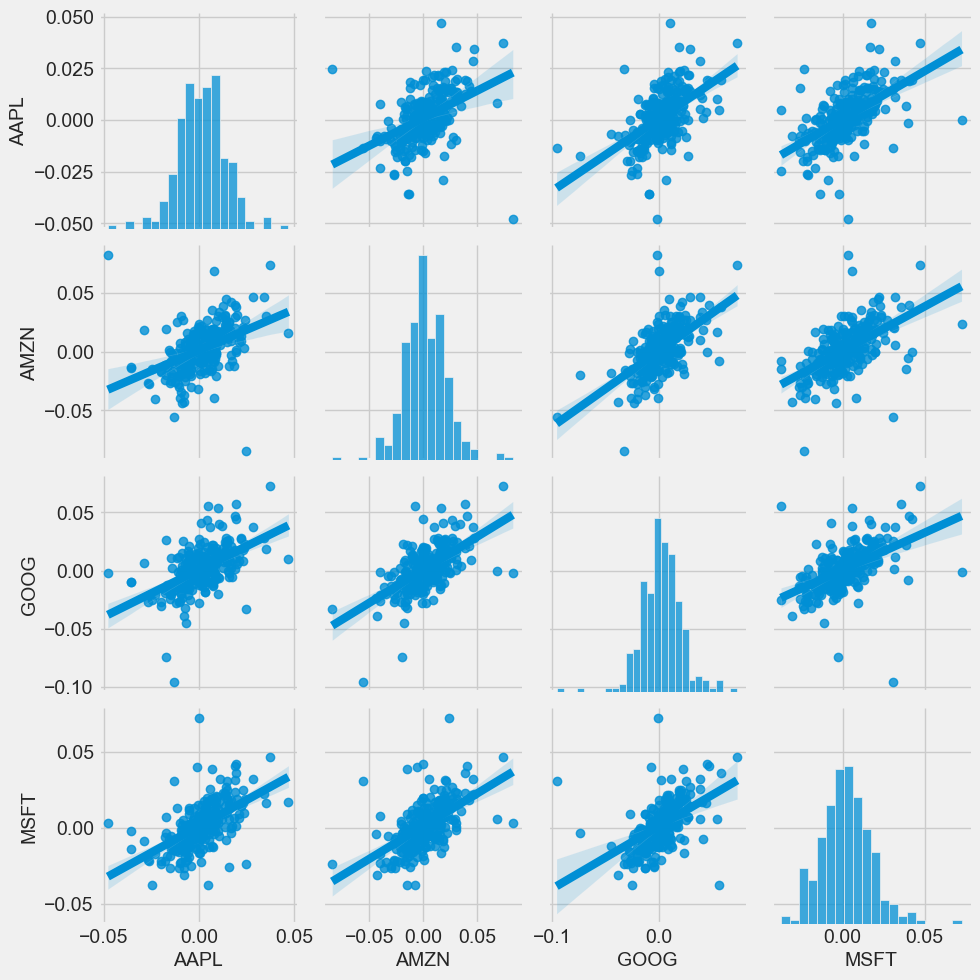

In [23]:
# Generating pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(tech_rets, kind='reg')

In [24]:
#A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison.

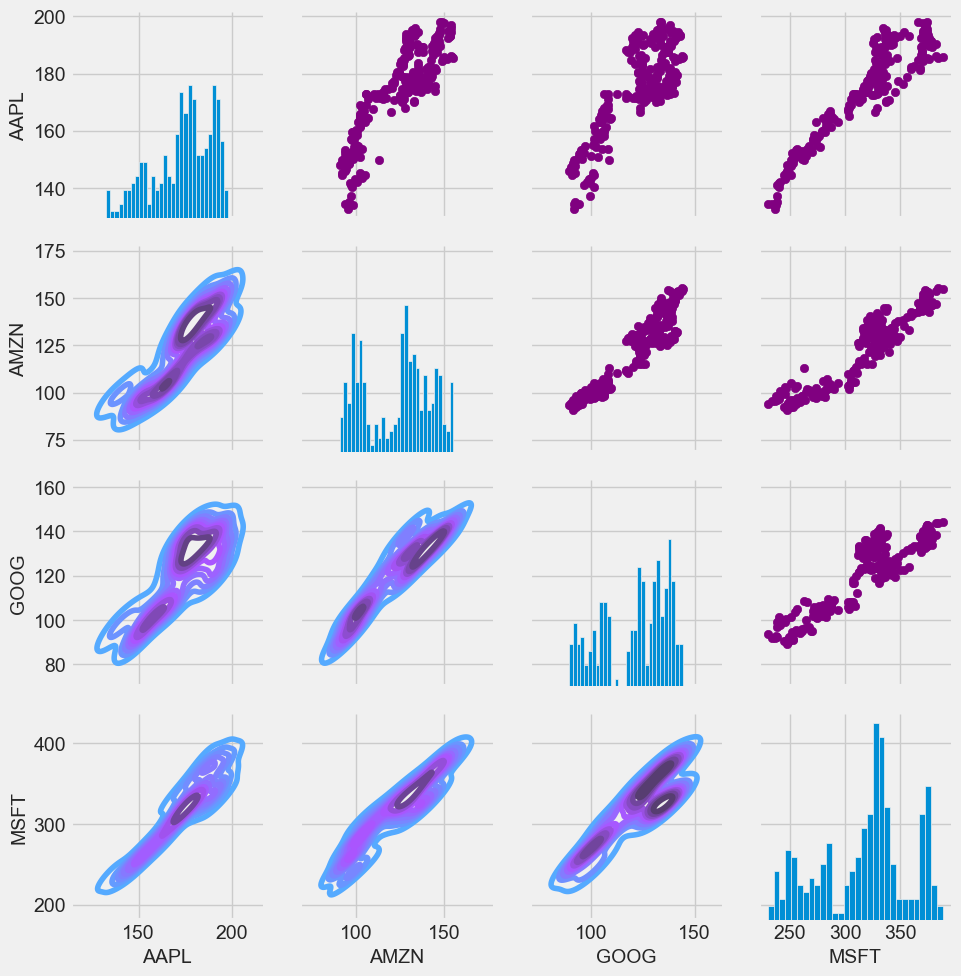

In [25]:
#Checking what kind of plots go in the diagonal, the upper triangle, and the lower triangle
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

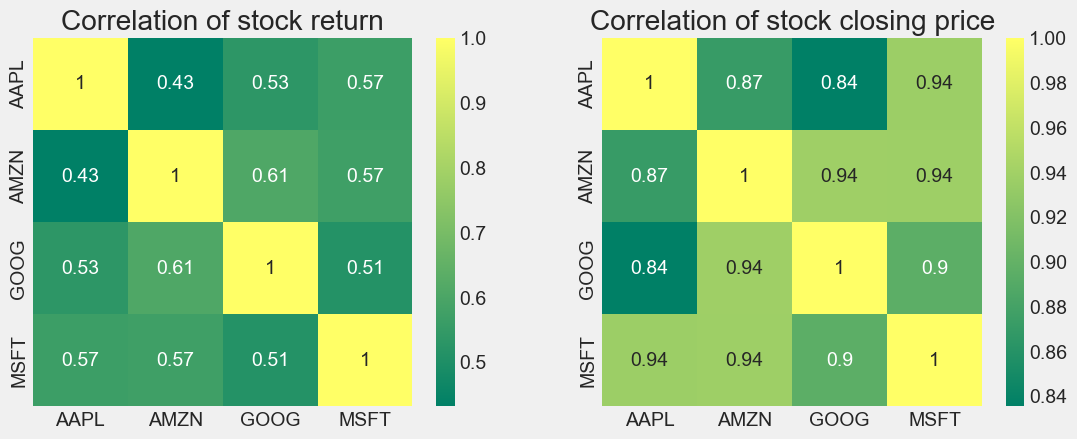

In [26]:
# Generating a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. 
# By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

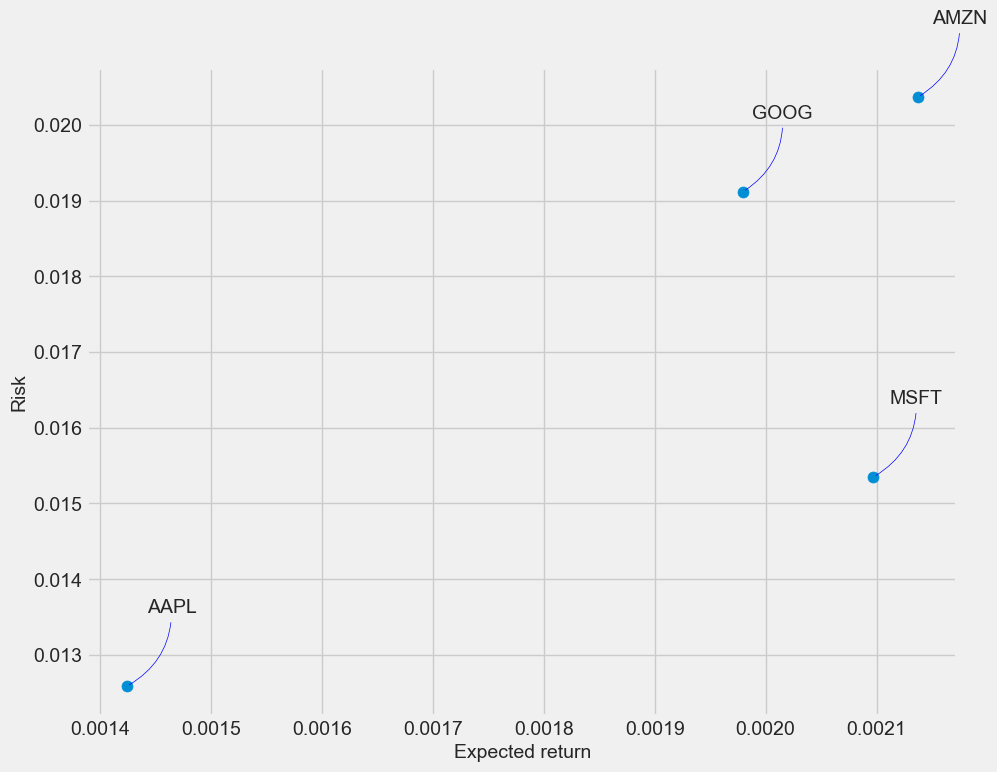

In [27]:
#How much value do we put at risk by investing in a particular stock can be obtained by comparing the expected return with
#the standard deviation of the daily returns.

rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [43]:
#Predicting Stock Prices of Apple
# Get the stock quote
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.449692,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.516597,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.655558,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.787856,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.767570,394024400
...,...,...,...,...,...,...
2024-01-08,182.089996,185.600006,181.500000,185.559998,185.559998,59144500
2024-01-09,183.919998,185.149994,182.729996,185.139999,185.139999,42841800
2024-01-10,184.350006,186.399994,183.919998,186.190002,186.190002,46792900


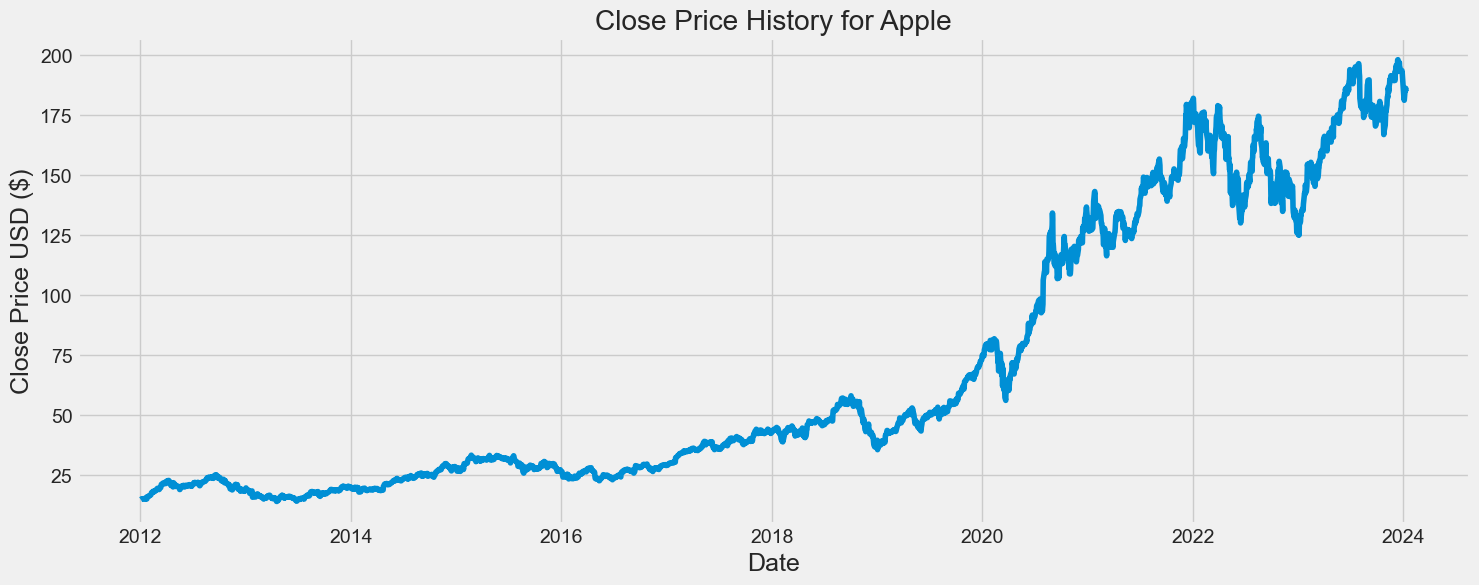

In [44]:
plt.figure(figsize=(16,6))
plt.title('Close Price History for Apple')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [45]:
#Predicting Stock Prices of Amazon
# Get the stock quote
df = pdr.get_data_yahoo('AMZN', start='2012-01-01', end=datetime.now())
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,8.794500,8.974000,8.777500,8.951500,8.951500,102216000
2012-01-04,8.960500,9.025000,8.803500,8.875500,8.875500,84104000
2012-01-05,8.797000,8.912500,8.702500,8.880500,8.880500,76182000
2012-01-06,8.903500,9.232500,8.875000,9.130500,9.130500,140168000
2012-01-09,9.138000,9.218500,8.850000,8.928000,8.928000,101138000
...,...,...,...,...,...,...
2024-01-08,146.740005,149.399994,146.149994,149.100006,149.100006,46757100
2024-01-09,148.330002,151.710007,148.210007,151.369995,151.369995,43812600
2024-01-10,152.059998,154.419998,151.880005,153.729996,153.729996,44421800


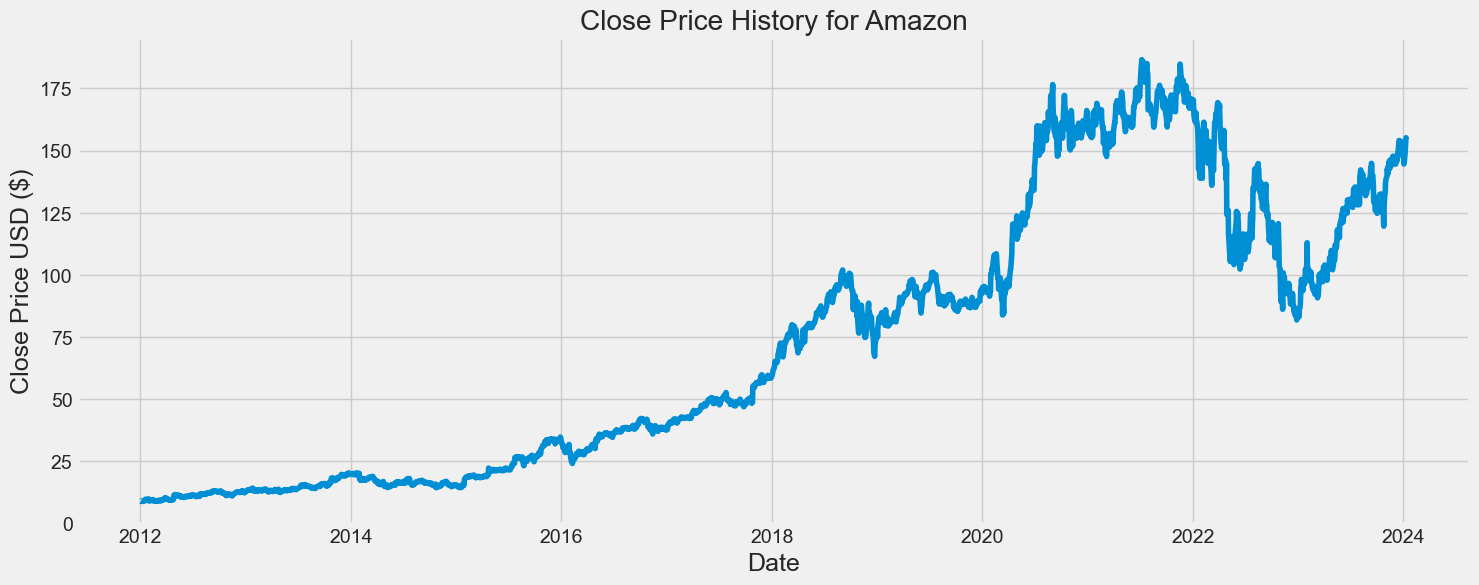

In [46]:
plt.figure(figsize=(16,6))
plt.title('Close Price History for Amazon')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [47]:
#Predicting Stock Prices of Google
# Get the stock quote
df = pdr.get_data_yahoo('GOOG', start='2012-01-01', end=datetime.now())
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981
...,...,...,...,...,...,...
2024-01-08,138.000000,140.639999,137.880005,140.529999,140.529999,17645300
2024-01-09,140.059998,142.800003,139.789993,142.559998,142.559998,19579700
2024-01-10,142.520004,144.524994,142.460007,143.800003,143.800003,16641900


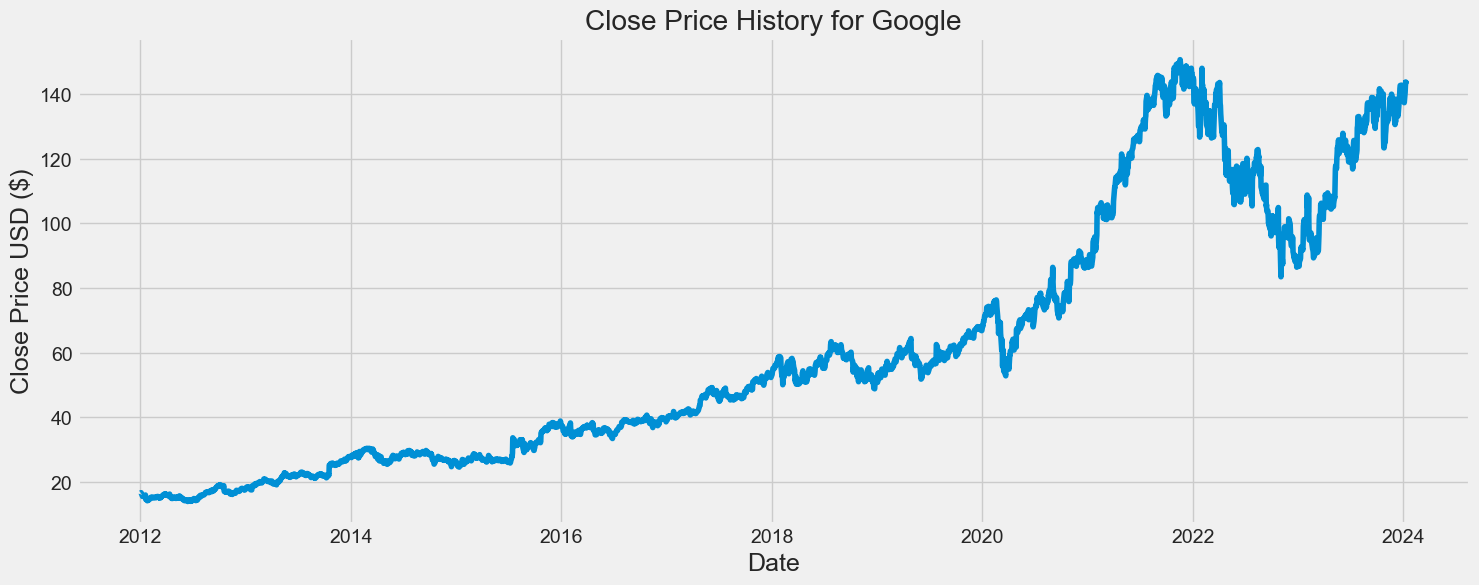

In [48]:
plt.figure(figsize=(16,6))
plt.title('Close Price History for Google')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [49]:
#Predicting Stock Prices of Microsoft
# Get the stock quote
df = pdr.get_data_yahoo('MSFT', start='2012-01-01', end=datetime.now())
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,26.549999,26.959999,26.389999,26.770000,21.278027,64731500
2012-01-04,26.820000,27.469999,26.780001,27.400000,21.778780,80516100
2012-01-05,27.379999,27.730000,27.290001,27.680000,22.001339,56081400
2012-01-06,27.530001,28.190001,27.530001,28.110001,22.343126,99455500
2012-01-09,28.049999,28.100000,27.719999,27.740000,22.049023,59706800
...,...,...,...,...,...,...
2024-01-08,369.299988,375.200012,369.010010,374.690002,374.690002,23134000
2024-01-09,372.010010,375.989990,371.190002,375.790009,375.790009,20830000
2024-01-10,376.369995,384.170013,376.320007,382.769989,382.769989,25514200


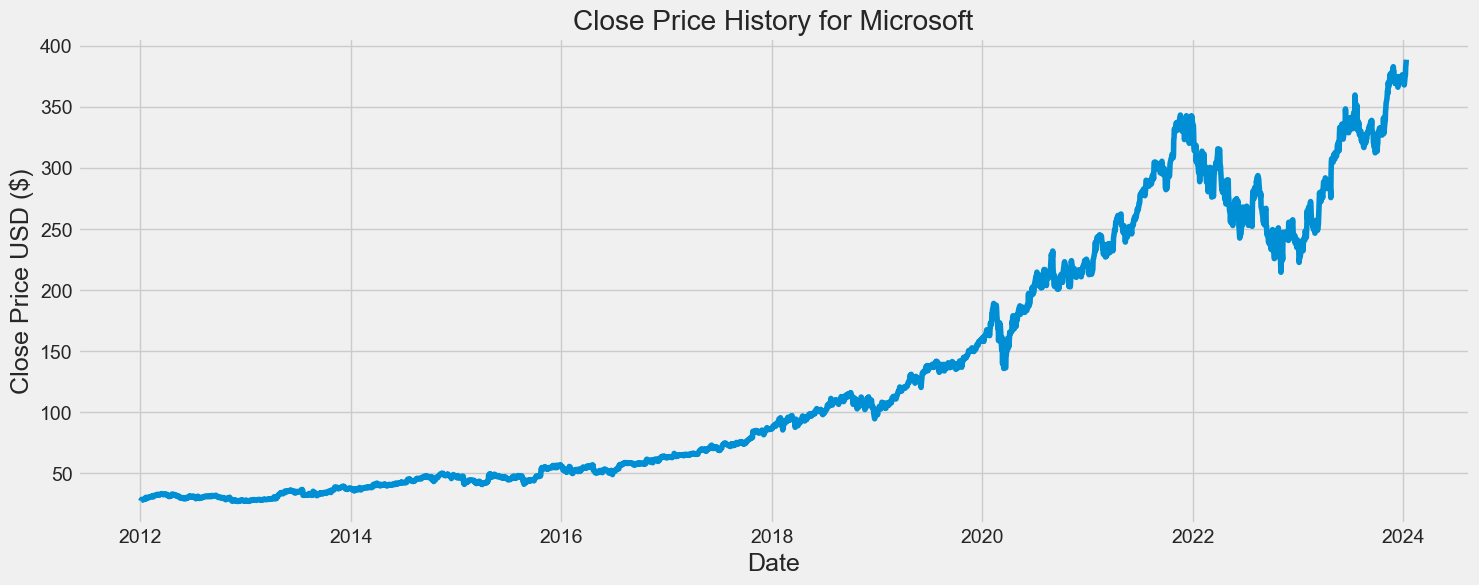

In [50]:
plt.figure(figsize=(16,6))
plt.title('Close Price History for Microsoft')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [51]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2876

In [54]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00110467],
       [0.00284451],
       [0.00361778],
       ...,
       [0.98425846],
       [0.9893952 ],
       [1.        ]])

In [86]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00110467, 0.00284451, 0.00361778, 0.0048053 , 0.00378348,
       0.00405965, 0.00372825, 0.00450152, 0.00519193, 0.00521955,
       0.0051367 , 0.00483292, 0.00922397, 0.0092792 , 0.00820215,
       0.00880972, 0.00864402, 0.00789837, 0.0089478 , 0.00872687,
       0.00972107, 0.00988677, 0.01068765, 0.01057719, 0.01099144,
       0.01184755, 0.01215134, 0.01140569, 0.01162662, 0.01071527,
       0.01016293, 0.01358741, 0.01347694, 0.01400166, 0.01353217,
       0.01380834, 0.01411212, 0.01375311, 0.01518917, 0.01483015,
       0.01634908, 0.01576913, 0.01499585, 0.01433305, 0.01510632,
       0.0155758 , 0.01552057, 0.01565866, 0.0173985 , 0.01767467,
       0.0178956 , 0.01720519, 0.01610052, 0.01552057, 0.01529964,
       0.01554819, 0.0155758 , 0.01717757, 0.01698426, 0.0160729 ])]
[0.015879585988936157]

[array([0.00110467, 0.00284451, 0.00361778, 0.0048053 , 0.00378348,
       0.00405965, 0.00372825, 0.00450152, 0.00519193, 0.00521955,
       0.0051367 , 0.00483292, 0.0

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
C:\Users\ghosh\anaconda_edx\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ghosh\anaconda_edx\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ghosh\anaconda_edx\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. f

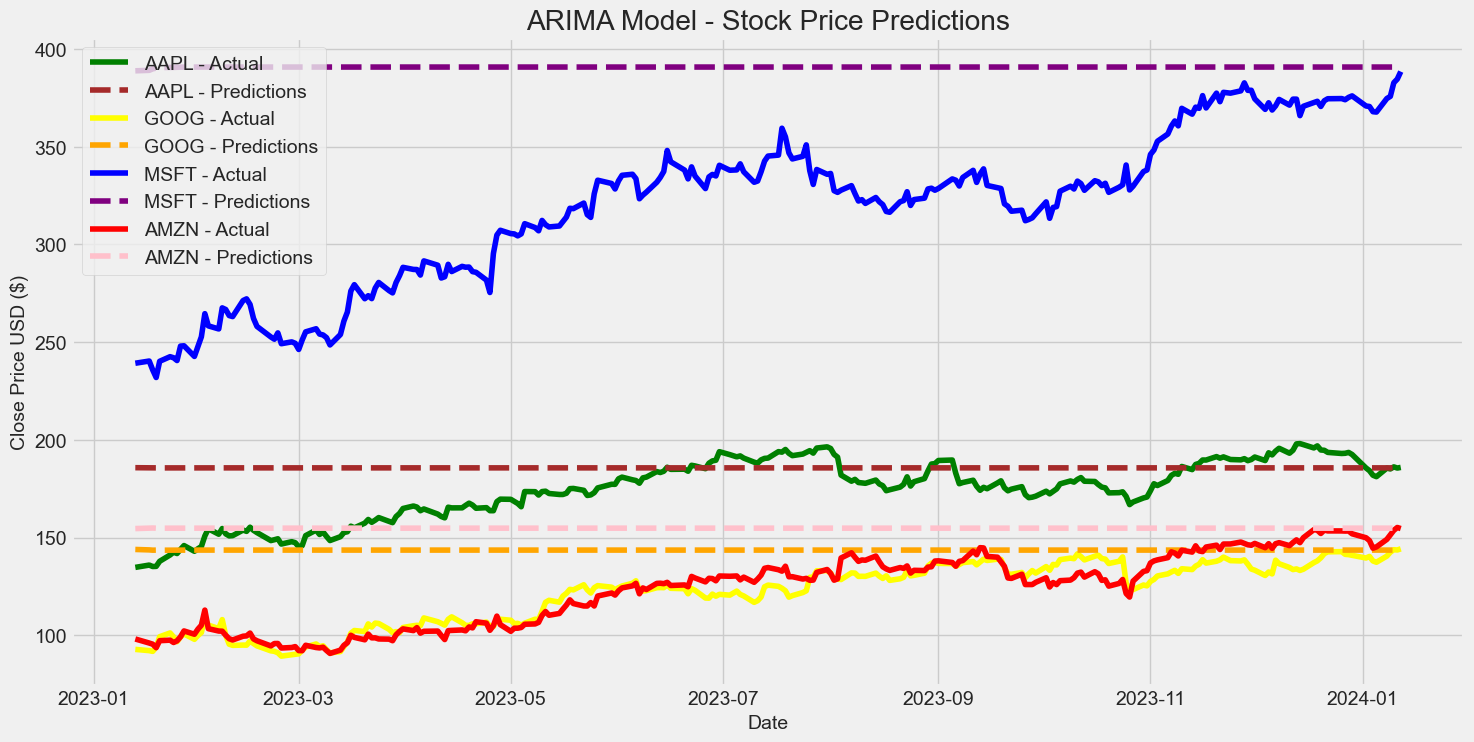

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()

from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA

# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Fetch stock data
company_list = []
for stock in tech_list:
    company = yf.download(stock, start, end)
    company_list.append(company)

# Define company names
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

# Associate company names with stock data
for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

# Train the ARIMA model for each company and make predictions
predictions_dict = {}

for i, stock in enumerate(tech_list):
    train_data = company_list[i]['Close']
    arima_model = ARIMA(train_data, order=(5, 1, 0))  # Adjust order as needed
    arima_fit = arima_model.fit()

    # Forecast future values
    forecast_steps = len(company_list[i]['Close'])  # Use all available data for forecasting
    forecast = arima_fit.get_forecast(steps=forecast_steps)
    forecast_values = forecast.predicted_mean.values

    # Store predictions in a dictionary
    predictions_dict[stock] = forecast_values

# Plot the predictions for each company with the specified color scheme
plt.figure(figsize=(16, 8))
plt.title('ARIMA Model - Stock Price Predictions')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')

# Use the specified color scheme for actuals and predictions
actual_colors = {'AMZN': 'red', 'MSFT': 'blue', 'GOOG': 'yellow', 'AAPL': 'green'}
pred_colors = {'AMZN': 'pink', 'MSFT': 'purple', 'GOOG': 'orange', 'AAPL': 'brown'}

for stock, forecast in predictions_dict.items():
    actual_color = actual_colors[stock]
    pred_color = pred_colors[stock]
    
    plt.plot(company_list[tech_list.index(stock)].index, company_list[tech_list.index(stock)]['Close'], label=f'{stock} - Actual', color=actual_color, linestyle='-')
    plt.plot(company_list[tech_list.index(stock)].index, forecast, label=f'{stock} - Predictions', color=pred_color, linestyle='--')

plt.legend()
plt.show()
